For info for runing my code is very straight forwerd since all you need to do is press run all, the only thing of any note is the second code cell where it has this 
"import importlib
import final
importlib.reload(final)"
this needs to be re run whever code from the module final.py is used

here is my only refrenc I belive that would be diffrent
Virtanen, Pauli, et al. "SciPy 1.0: Fundamental Algorithms for Scientific Computing in Python." Nature Methods, vol. 17, no. 3, 2020, pp. 261-272, https://doi.org/10.1038/s41592-019-0686-2.

here are my refrences coped from the midterm 

https://github.com/zbpetersbuf/CP1-24-midterm/blob/6a556ae8907d8a0979d1ec0fc8c59f581d01c5fd/zbpetersbuf/code/workinh.py#L17-L50

Bessel, Friedrich Wilhelm (2010). "The calculation of longitude and latitude from geodesic measurements (1825)". Astron.
    Nachr. 331 (8): 852–861. arXiv:0908.1824. Bibcode:2010AN....331..852K. doi:10.1002/asna.201011352. S2CID
    118760590. English translation of Astron. Nachr. 4, 241–254 (1825).

Helmert, Friedrich R. (1964). Mathematical and Physical Theories of Higher Geodesy, Part 1 (1880). St. Louis: Aeronautical
    Chart and Information Center. Retrieved 2011-07-30. English translation of Die Mathematischen und Physikalischen
    Theorieen der Höheren Geodäsie, Vol. 1 (Teubner, Leipzig, 1880).

Karney, Charles F. F. (January 2013). "Algorithms for geodesics". Journal of Geodesy. 87 (1): 43–55. arXiv:1109.4448.
    Bibcode:2013JGeod..87...43K. doi:10.1007/s00190-012-0578-z. Addenda.

Legendre, Adrien-Marie (1806). "Analyse des triangles tracės sur la surface d'un sphėroïde". Mémoires de la classe des
    sciences mathématiques et physiques de l'Institut National de France (1st sem): 130–161. Retrieved 2011-07-30.

Rainsford, H. F. (1955). "Long geodesics on the ellipsoid". Bulletin Géodésique. 37: 12–22. Bibcode:1955BGeod..29...12R.
    doi:10.1007/BF02527187. S2CID 122111614.

Rapp, Ricahrd H. (March 1993). Geometric Geodesy, Part II (Technical report). Ohio State University. Retrieved 2011-08-01.

Vincenty, Thaddeus (April 1975a). "Direct and Inverse Solutions of Geodesics on the Ellipsoid with application of nested
    equations". Survey Review. XXIII (176): 88–93. Bibcode:1975SurRv..23...88V.
    doi:10.1179/sre.1975.23.176.88. Retrieved 2009-07-11. In selecting a formula for the solution of geodesics it is of
    primary importance to consider the length of the program, that is the amount of core which it will occupy in the computer
    along with trigonometric and other required functions.

Vincenty, Thaddeus (August 1975b). Geodetic inverse solution between antipodal points (PDF) (Technical report). DMAAC
    Geodetic Survey Squadron. doi:10.5281/zenodo.32999.

Vincenty, Thaddeus (April 1976). "Correspondence". Survey Review. XXIII (180): 294.

Geocentric Datum of Australia (GDA) Reference Manual. Intergovernmental committee on survey and mapping (ICSM).
    February 2006. ISBN 0-9579951-0-5. Archived from the original (PDF) on 2009-06-26. Retrieved 2009-07-11.

In [1]:
import os
import math as m
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys
sys.path.append('/workspaces/CP1-24-final/zbpetersbuf/code')
import final as fin

In [2]:
import importlib
import final
importlib.reload(final)

<module 'final' from '/workspaces/CP1-24-final/zbpetersbuf/code/final.py'>

The solid lines in the image bellow are the fits i created, the dashed lines are the original data collection, and the legend shows which trials are used with their respective temp
the reson they got both up right and down left are because i walked allong the sine wave in one direction and then back along the other, ie the end point of one became the start point of another
Im aware that the temps jump, thats because the compler function does it in no specific order so the temps do corespond with the corect run, a bit more than halfway through me taking the data the temp droped by one degree F

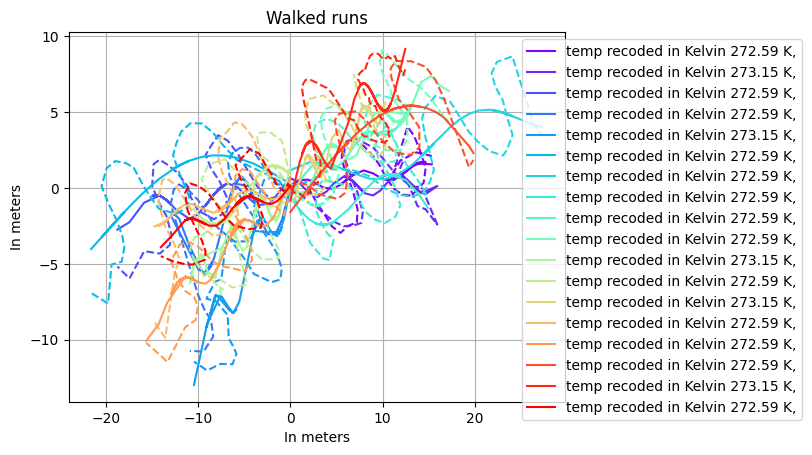

In [ ]:
import matplotlib.cm as cm

files = fin.filenamelister('sinewalk', '.csv')

plt.figure()
cmap = cm.rainbow
norm = plt.Normalize(vmin=0, vmax=19)

for i in range(20):
    if i not in [10, 16]:
        file = files[i]
        temp = fin.fah_to_kel(fin.find_fah(fin.filenamelister(fin.findmdfromcsv(file))[0]))
        yreal, y, x, adj, _= fin.funfit(file)
        color = cmap(norm(i))
        plt.plot(x, y, color=color, label=f'temp recoded in Kelvin {temp} K,')
        plt.plot(x, yreal, color=color, linestyle='--')

plt.legend(loc='upper left', bbox_to_anchor=(0.9, 1))
plt.title('Walked runs')
plt.xlabel('In meters')
plt.ylabel('In meters')

plt.grid()

In this graph i filterd out some runs by only including fits that have a better adjusted r sqrd value than 0.2, aswell as manualy excluding the sets of data numberd 10 and 16, they are the same data each time but they arnt specificaly the trial run 10 and 16

adr value 0.03579144664860734 is too low for FFT. It needs to be greater than 0.2.
adr value -0.06831253810825322 is too low for FFT. It needs to be greater than 0.2.
adr value 0.0463001077343419 is too low for FFT. It needs to be greater than 0.2.
adr value 0.16764699397750793 is too low for FFT. It needs to be greater than 0.2.
adr value 0.03503815322394688 is too low for FFT. It needs to be greater than 0.2.
adr value 0.019381629930073085 is too low for FFT. It needs to be greater than 0.2.
adr value 0.12878425595809828 is too low for FFT. It needs to be greater than 0.2.


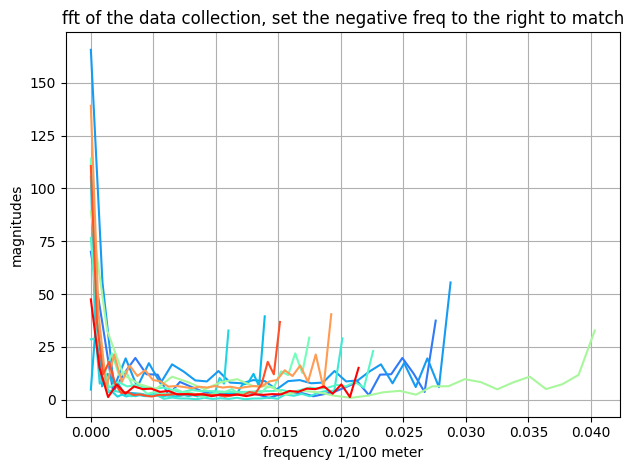

In [15]:
plt.figure()

for i in range(20):
    if i not in [10, 16]:

        file = files[i]
        _, ynew, x, adj, tim = fin.funfit(file)
        fft = fin.fftfinding(ynew, adj, tim, 0.2)
        xax = fin.freqfinder(x)
        if fft is not None:
            color = cmap(norm(i)) 
            plt.plot(xax, np.abs(fft), color=color)

plt.title('fft of the data collection, set the negative freq to the right to match')
plt.xlabel('frequency 1/100 meter')
plt.ylabel('magnitudes')
plt.tight_layout()
plt.grid()


adr value 0.03579144664860734 is too low for FFT. It needs to be greater than 0.2.
adr value -0.06831253810825322 is too low for FFT. It needs to be greater than 0.2.
adr value 0.0463001077343419 is too low for FFT. It needs to be greater than 0.2.
adr value 0.16764699397750793 is too low for FFT. It needs to be greater than 0.2.
adr value 0.03503815322394688 is too low for FFT. It needs to be greater than 0.2.
adr value 0.019381629930073085 is too low for FFT. It needs to be greater than 0.2.
adr value 0.12878425595809828 is too low for FFT. It needs to be greater than 0.2.


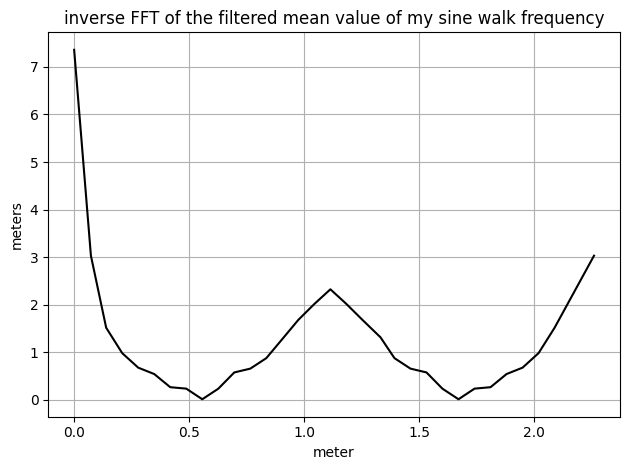

In [ ]:
plt.figure()

compfft = [] 
compfreq = []
for i in range(20):
    if i not in [10, 16]:
        file = files[i]
        _, ynew, x, adj, tim = fin.funfit(file)
        fft = fin.fftfinding(ynew, adj, tim, 0.2)
        freq = fin.freqfinder(x)

        if fft is not None:
                
            newfft, newfreq = fin.filteredfreq(np.abs(fft),freq,0.7,0.01)
            compfft.append(newfft)
            compfreq.append(newfreq)

asdf = np.array(compfreq)
asdf2 = np.array(compfft)

xax = fin.sumfunk(asdf)
newfft2 = fin.sumfunk(asdf2)

plt.plot(xax*100, fin.inv_fft(newfft2,True), color='black')

plt.title('inverse FFT of the filtered mean value of my sine walk frequency')
plt.xlabel('meter3')
plt.ylabel('meters')
plt.tight_layout()
plt.grid()